In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### 1. Explore risk return characteristics of the five stocks

In [2]:
data = pd.read_excel('Assignment1_data-3.xlsx', index_col=0)
data.head(10)

,XOM,NKE,AMZN,GS,V
Date,,,,,
2010-01-29,-0.055140,-0.035114,-0.067722,-0.119166,-0.062086
2010-02-26,0.015366,0.060392,-0.055897,0.053658,0.041143
2010-03-31,0.030462,0.091272,0.146706,0.091334,0.067425
2010-04-30,0.011794,0.032789,0.009796,-0.149036,-0.008788
2010-05-28,-0.101372,-0.046503,-0.084902,-0.004063,-0.195556
2010-06-30,-0.056070,-0.063001,-0.129125,-0.090046,-0.023599
2010-07-30,0.045733,0.090155,0.078986,0.148930,0.036749
2010-08-31,-0.002178,-0.049430,0.058868,-0.089776,-0.057873
2010-09-30,0.045339,0.148714,0.258191,0.055868,0.076544


In [3]:
info = data.describe()
info

,XOM,NKE,AMZN,GS,V
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.008822,0.016074,0.020023,0.009430,0.016832
std,0.071138,0.069885,0.087494,0.084758,0.058540
min,-0.261858,-0.216299,-0.237525,-0.230014,-0.195556
25%,-0.025525,-0.027602,-0.046325,-0.051811,-0.023151
50%,0.007143,0.010253,0.021597,0.013368,0.022759
75%,0.044313,0.063977,0.072995,0.061485,0.052578
max,0.269156,0.183535,0.270596,0.233954,0.166113


In [4]:
mean = info.iloc[1,:]*12
mean.round(4)

XOM     0.1059
NKE     0.1929
AMZN    0.2403
GS      0.1132
V       0.2020
Name: mean, dtype: float64

In [5]:
stdv = info.iloc[2,:]*np.sqrt(12)
stdv.round(4)

XOM     0.2464
NKE     0.2421
AMZN    0.3031
GS      0.2936
V       0.2028
Name: std, dtype: float64

In [6]:
cov = data.cov()*12 
cov.round(2)

,XOM,NKE,AMZN,GS,V
XOM,0.06,0.01,0.01,0.04,0.02
NKE,0.01,0.06,0.02,0.03,0.02
AMZN,0.01,0.02,0.09,0.03,0.03
GS,0.04,0.03,0.03,0.09,0.03
V,0.02,0.02,0.03,0.03,0.04


In [7]:
skewness = data.skew()
skewness.round(2)

XOM     0.39
NKE    -0.29
AMZN    0.30
GS      0.10
V      -0.23
dtype: float64

In [8]:
rf = 0.02
sharpe_ratio = (mean - rf)/stdv
sharpe_ratio.round(2)

XOM     0.35
NKE     0.71
AMZN    0.73
GS      0.32
V       0.90
dtype: float64

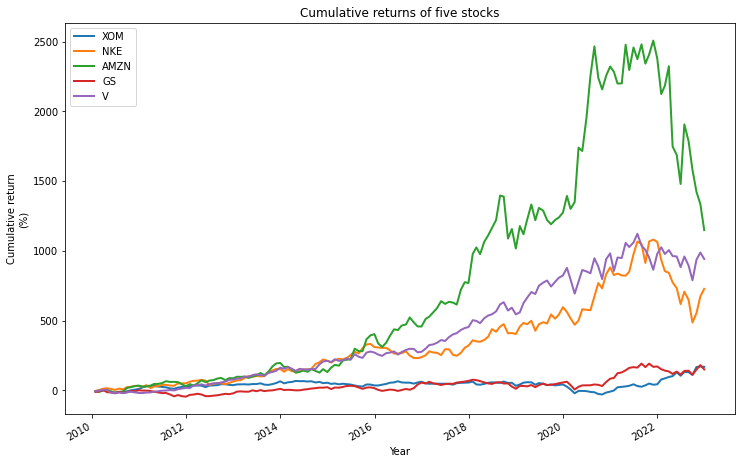

In [9]:
cumulative_returns = ((data + 1).cumprod() - 1)*100
ax = cumulative_returns.plot(figsize=(12,8), lw=2)
plt.xlabel('Year')
plt.ylabel('Cumulative return\n(%)')
plt.title('Cumulative returns of five stocks')
plt.show()

### 2. Visualize the investment opportunity set and the efficient frontier

In [10]:
#randomly generate weights for 5 stocks and from 500 portfolios
assets = set(data.columns)
p_returns = []
p_volatilities = []
p_weights = []

np.random.seed(0)
for x in range(500):
    weights = np.random.uniform(-0.1,1,len(assets))
    weights /= np.sum(weights)
    
    p_returns.append(np.sum(weights * mean))
    p_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(cov, weights))))
    p_weights.append(weights)
                    
p_returns = np.array(p_returns)
p_volatilities = np.array(p_volatilities)
p_weights = np.array(p_weights)
                                  
#portfolio_returns, portfolio_volatilities

In [11]:
cov_inverse = np.linalg.inv(cov)
r_min = 0.13
f_returns = []
for i in range(80):
    r_min += 0.0015
    f_returns.append(r_min)

l = np.ones((5, 1))
A = np.dot(mean.T,np.dot(cov_inverse, mean))
B = np.dot(mean.T,np.dot(cov_inverse, l))
C = np.dot(l.T, np.dot(cov_inverse, l))

f_stdvs = []
for u in f_returns :
    stdvs = np.sqrt((C*u**2 - 2*B*u + A) / (A*C - B**2))
    f_stdvs.append(stdvs)

f_stdvs = np.array(f_stdvs)
f_stdvs = np.reshape(f_stdvs,(80,1))

In [12]:
min_var_stdv = np.sqrt(1/C) 
min_var_return = B/C
min_var_return

array([[0.1790134]])

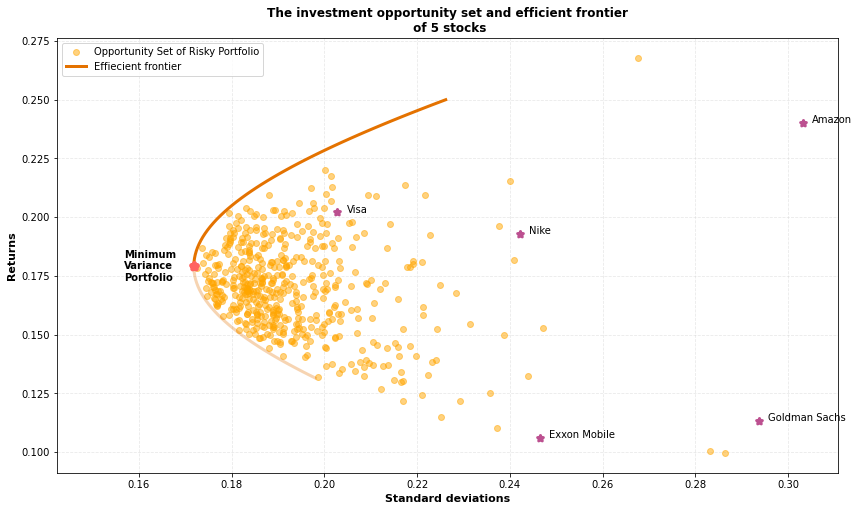

In [13]:
# plot opportunity set
fig, ax = plt.subplots(figsize=(14,8))
plt.grid(color='lightgray', linestyle='--', alpha=0.5, zorder=1)

ax.scatter(x=p_volatilities,
             y=p_returns,alpha=0.5, color='#ffa600', zorder=2, label='Opportunity Set of Risky Portfolio')

ax.scatter(x=stdv['XOM'],y=mean['XOM'], marker='*', color='#bc5090', lw=3)
plt.annotate('Exxon Mobile', xy=(stdv['XOM'],mean['XOM']), 
             xytext=(stdv['XOM'] + 0.002, mean['XOM']),fontsize=10)
             
ax.scatter(x=stdv['NKE'],y=mean['NKE'], marker='*', color='#bc5090', lw=3)
plt.annotate('Nike', xy=(stdv['NKE'],mean['NKE']), 
             xytext=(stdv['NKE'] + 0.002, mean['NKE']),fontsize=10)

ax.scatter(x=stdv['AMZN'],y=mean['AMZN'], marker='*', color='#bc5090', lw=3)
plt.annotate('Amazon', xy=(stdv['AMZN'],mean['AMZN']), 
             xytext=(stdv['AMZN'] + 0.002, mean['AMZN']),fontsize=10)

ax.scatter(x=stdv['GS'],y=mean['GS'], marker='*', color='#bc5090', lw=3)
plt.annotate('Goldman Sachs', xy=(stdv['GS'],mean['GS']), 
             xytext=(stdv['GS'] + 0.002, mean['GS']),fontsize=10)

ax.scatter(x=stdv['V'],y=mean['V'], marker='*', color='#bc5090', lw=3)
plt.annotate('Visa', xy=(stdv['V'],mean['V']), 
             xytext=(stdv['V'] + 0.002, mean['V']),fontsize=10)

ax.scatter(x=min_var_stdv,y=min_var_return, marker='*', color='#ff6361', lw=5, zorder=3)
plt.annotate('Minimum\nVariance\nPortfolio', xy=(min_var_stdv,min_var_return), 
             xytext=(min_var_stdv - 0.015, min_var_return - 0.006), fontsize=10, fontweight='bold')

#plot efficient frontier
ax.plot(f_stdvs[33:], f_returns[33:], color='#e47200', lw=3, label='Effiecient frontier')
ax.plot(f_stdvs[:32], f_returns[:32], color='#e47200', lw=3,alpha=0.3)

ax.xaxis.set_data_interval(0.15, 0.3)
plt.xlabel('Standard deviations', fontsize = 11, fontweight='bold')
plt.ylabel('Returns', fontsize = 11, fontweight='bold')
plt.title('The investment opportunity set and efficient frontier\n of 5 stocks', fontsize = 12, fontweight='bold')
plt.legend()
plt.show()
 

#### The efficient frontier with risk-free asset

In [14]:
#max_sharpe ratio portfolio
max_weights = np.dot(cov_inverse,(mean-rf)) / np.dot(l.T,np.dot(cov_inverse,(mean-rf)))
max_return = np.sum(max_weights * mean)
max_stdv = np.sqrt(np.dot(max_weights.T, np.dot(cov, max_weights)))
max_weights.round(3), max_return.round(4), max_stdv.round(4)                                                  

(array([ 0.013,  0.306,  0.243, -0.169,  0.608]), 0.2223, 0.1939)

In [15]:
max_stdv

0.19387072372042874

In [16]:
return1 = 0.2*rf + 0.8*max_return
stdv1 = np.sqrt((0.8**2)*(max_stdv**2))
return1, stdv1

(0.18185865885022667, 0.15509657897634302)

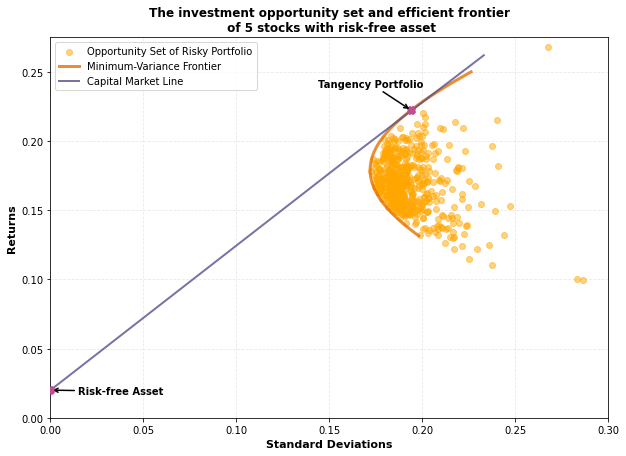

In [17]:
# plot opportunity set
fig, ax = plt.subplots(figsize=(10,7))
plt.grid(color='lightgray', linestyle='--', alpha=0.5, zorder=1)

ax.scatter(x=p_volatilities,
             y=p_returns,alpha=0.5, color='#ffa600', zorder=2, label='Opportunity Set of Risky Portfolio')

#optimal portfolio
ax.scatter(x=max_stdv,y=max_return, marker='X', color='#bc5090', lw=3, zorder=3)
plt.annotate('Tangency Portfolio', xy=(max_stdv,max_return), 
             xytext=(max_stdv - 0.05,max_return + 0.017),fontsize=10, 
             arrowprops=dict(arrowstyle='->',lw=1.5), fontweight='bold')

#rf asset
ax.scatter(x=0,y=rf, marker='X', color='#bc5090', lw=3, zorder=4)
plt.annotate('Risk-free Asset', xy=(0,rf), 
             xytext=(0.015,0.017),fontsize=10, arrowprops=dict(arrowstyle='->',lw=1.5), fontweight='bold')

#plot minimum variance frontier
ax.plot(f_stdvs, f_returns, color='#e47200', lw=3, alpha=0.8, label='Minimum-Variance Frontier')

#CML 
ax.plot([0,0.155,0.194, 0.233],[0.02,0.182,0.222, 0.262], color='#58508d',lw=2, alpha=0.8, 
        linestyle='-', label='Capital Market Line')


plt.xlim(0.0, 0.3)
plt.ylim(0.0, 0.275)

plt.xlabel('Standard Deviations', fontsize = 11, fontweight='bold')
plt.ylabel('Returns', fontsize = 11, fontweight='bold')
plt.title('The investment opportunity set and efficient frontier\n of 5 stocks with risk-free asset', fontsize = 12, fontweight='bold')
plt.legend()
plt.show()
 

### 3. Portfolio Allocation

In [18]:
#optimal weight for risky portfolio 
y_T = (max_return - 0.02)/(8*(max_stdv**2))
y_A = (max_return - 0.02)/(12*(max_stdv**2))
y_T.round(4), y_A.round(4) 

(0.6729, 0.4486)

In [19]:
#Tom capital allocation for risky portfolio
investment = 2000000
T_p = investment*(y_T.round(4))
T_rf = investment*(1 - y_T.round(4))
T_p, T_rf

(1345800.0, 654199.9999999999)

In [20]:
#Tom - Five stock allocations 
A = T_p * max_weights.round(4)
A.round(0)

array([  17226.,  411411.,  326760., -227979.,  818381.])

In [21]:
#Amy capital allocation for risky portfolio
A_p = investment*(y_A.round(4))
A_rf = investment*(1 - y_A.round(4))
A_p, A_rf

(897200.0, 1102800.0)

In [22]:
#Amy - Five stock allocations 
B = A_p * max_weights.round(4)
B.round(0)

array([  11484.,  274274.,  217840., -151986.,  545587.])